# Interactive Graphs

This tutorial demonstrates how to use widgets to interact with graphs and see the respective views in Urchin.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/VirtualBrainLab/urchin-examples/blob/main/basics/interactive_graphs.ipynb)

## Loading dependencies and necessary data:

### Install Urchin

Urchin is a Python package stored on PyPI, the following code needs to be run the first time you use Urchin in a Python environment. 

Urchin's full documentation can be found [on our website](https://virtualbrainlab.org/urchin/installation_and_use.html).

In [ ]:
#Installing Urchin and matplotlib compatability if running for the first time
! pip install ipympl > /dev/null 2>&1
! pip install oursin==0.5.3 > /dev/null 2>&1

In [ ]:
# To enable use on colab:
from google.colab import output
output.enable_custom_widget_manager()

In [2]:
import oursin as urchin
urchin.setup()

%matplotlib widget

(urchin) Client is already connected. Use ID: 43e409bd


### Loading in the data:

For this tutorial, we have datasets loaded onto google drive. If using your own data, be sure to reference documentation for proper formatting.

In [3]:
import numpy as np
import pandas as pd
import requests
import io

In [4]:
def download_gdrive_npy(gdrive_url):
    file_id = gdrive_url.split("/")[-2]

    # Construct the direct download link
    download_url = f"https://drive.google.com/uc?export=download&id={file_id}"
    response = requests.get(download_url)

    if response.status_code == 200:
        data = np.squeeze(np.load(io.BytesIO(response.content)))
    else:
        response.raise_for_status()

    return data

def download_csv(gdrive_url):
    file_id = gdrive_url.split("/")[-2]
    download_link = f"https://drive.google.com/uc?id={file_id}"
    response = requests.get(download_link)

    df = pd.read_csv(io.StringIO(response.text))
    return df

In [5]:
st_samp = download_gdrive_npy('https://drive.google.com/file/d/1cv0ylzlQHsjPobVMfjDzQsALKBjmhZ7L/view?usp=sharing')
sc = download_gdrive_npy('https://drive.google.com/file/d/17ao2qgmuRMew1CIDBBdfoUY5LojdFCOu/view?usp=sharing')
event_start = download_gdrive_npy('https://drive.google.com/file/d/1bFN-ZyOulUtbNs7WIq9SqyPbrSBaaijB/view?usp=sharing')
event_ids = download_gdrive_npy('https://drive.google.com/file/d/1n4smr91u-n8NXzqt6HO9CN13we_13rhR/view?usp=sharing')
locations = download_csv('https://drive.google.com/file/d/1b9LDBELDmijduN1pjnfjlylH8cYuFQW2/view?usp=sharing')

## Using graphing objects:

Creating a graph object:

In [6]:
neuron_graph = urchin.ui.interactive_plot()

Attatching the data to the graph object:

In [7]:
neuron_graph.avg_and_bin(st_samp, sc, event_start, event_ids, window_start_sec=0.1, event_duration_sec = 0.3, window_end_sec=0.2, sample= True)
neuron_graph.avg_data = np.delete(neuron_graph.avg_data, 88, axis=0) #This line is specific for this dataset

##### Displaying a graph of activity from one neuron across all stimuli:

Note: since these graphs are from the same object, if you are coming back to this graph after running the stimulus view function, simply re-run this function to regain interactivity control.

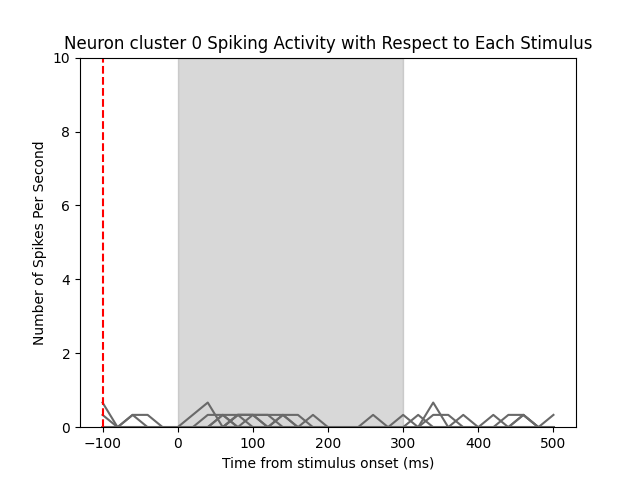

In [8]:
neuron_graph.plot_neuron_view_interactive_graph()
# for this dataset, start by checking out neuron 354 to see interesting data

##### Displaying a graph of neural activity for for each stimuli:

Note: This uses randomly generated colors but if you want to set custom colors for the graph without generating neurons in a brainview, you can set `neuron_graph.neuron_colors=[list of colors of length of # neurons]` outside of this function, and `neuron_graph.neuron_colors = None` if trying to go back to random.

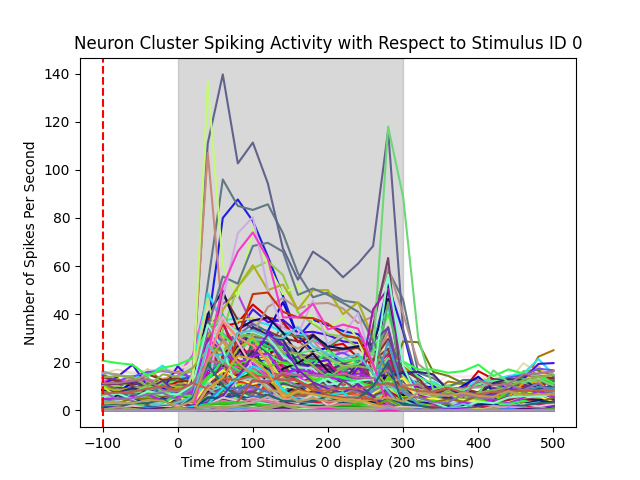

In [9]:
neuron_graph.plot_stim_view_interactive_graph()

## Incoorporating Urchin component:

In [10]:
urchin.ccf25.load()

This loads the brain areas within Urchin, specificially highlighting the brain region of interest

In [11]:
urchin.ccf25.grey.set_visibility(True)
urchin.ccf25.grey.set_material('transparent-unlit')
urchin.ccf25.grey.set_color([0,0,0])
urchin.ccf25.grey.set_alpha(0.1)
area_list = urchin.ccf25.get_areas(["VISp", "PTLp", "VISam", "VISpm"])
urchin.ccf25.set_visibilities(area_list, True)
urchin.ccf25.set_materials(area_list,'transparent-unlit')
urchin.ccf25.set_colors(area_list,[[0,0,0],[0,0,0],[0,0,0],[0,0,0]])
urchin.ccf25.set_alphas(area_list,0.2)

#### Creating the graph that is attatched to the brain view in Urchin:
For this one we will use a separate graph object, so that changing the slider in the graphs above will not affect the neurons in our brain view.

In [12]:
urchin_graph = urchin.ui.interactive_plot()
urchin_graph.avg_and_bin(st_samp, sc, event_start, event_ids, window_start_sec=0.1, event_duration_sec = 0.3, window_end_sec=0.2, sample= True)
urchin_graph.avg_data = np.delete(urchin_graph.avg_data, 88, axis=0) #This line is specific for this dataset

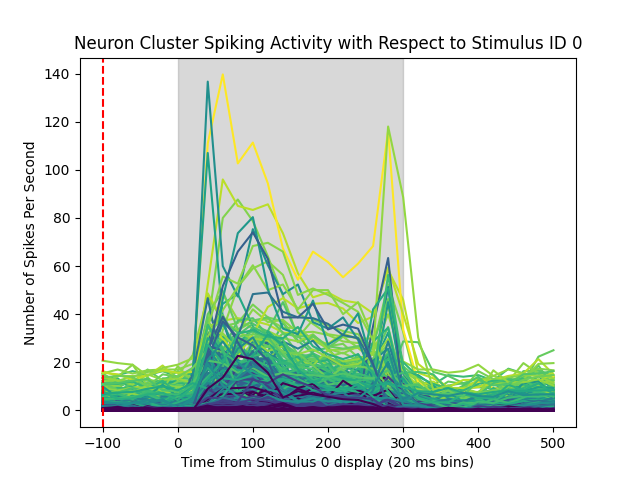

In [13]:
urchin_graph.plot_stim_view_interactive_graph(locations)